In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [4]:
with open('hpbooks/hp7english.txt', 'r') as file: #turn into string to allow formating
    hpeng = file.read().replace('\n', '') #strip new lines

In [5]:
hpeng

'\x0c\x0c \x0c \x0c          Harry Potter AND THE DEATHLY HALLOWS    \x0c            also by j. k. rowling Harry Potter and the Sorcerer’s Stone Year One at Hogwarts Harry Potter and the Chamber of Secrets Year Two at Hogwarts Harry Potter and the Prisoner of Azkaban Year Three at Hogwarts Harry Potter and the Goblet of Fire Year Four at Hogwarts Harry Potter and the Order of the Phoenix Year Five at Hogwarts Harry Potter and the Half-Blood Prince Year Six at Hogwarts Harry Potter and the Deathly Hallows Year Seven at Hogwarts \x0cHarry Potter AND THE DEATHLY HALLOWS         BY J. K. Rowling ILLUSTRATIONS  BY  Mary  GrandPré      ARTHUR A. LEVINE BOOKS AN IMPRINT OF SCHOLASTIC Press. \x0c    Text copyright © 2007 by J. K. Rowling Illustrations by Mary GrandPré copyright © 2007 by Warner Bros.  HARRY POTTER & all related characters and elements are tm of and © WBEI. Harry Potter Publishing Rights © J. K. Rowling. All rights reserved. Published by Arthur A. Levine Books, an imprint of Sc

In [6]:
# Clean text from punctuation
for char in ''"'-.’“”—,\n;:"'':
    hpeng=hpeng.replace(char,' ')
# then make lower case
hpeng = hpeng.lower()

In [7]:
token_hpeng = word_tokenize(hpeng) #tokenize words making them separate

In [8]:
len(token_hpeng)

220165

In [9]:
token_hpeng[:5] #get first 5 words

['harry', 'potter', 'and', 'the', 'deathly']

In [10]:
fd_hpeng = FreqDist(token_hpeng) #get a count of each words apperance with freq dist


In [11]:
fd_hpeng

FreqDist({'the': 10805, 'and': 5591, 'to': 4987, 'of': 4289, 'he': 4233, 'a': 3696, 'harry': 3145, 'it': 3035, 's': 2868, 'was': 2790, ...})

In [12]:
#shows the top 10 words in the text
fd_hpeng.most_common(120)

[('the', 10805),
 ('and', 5591),
 ('to', 4987),
 ('of', 4289),
 ('he', 4233),
 ('a', 3696),
 ('harry', 3145),
 ('it', 3035),
 ('s', 2868),
 ('was', 2790),
 ('his', 2633),
 ('you', 2585),
 ('i', 2428),
 ('in', 2320),
 ('that', 2166),
 ('?', 2135),
 ('had', 2002),
 ('said', 1979),
 ('!', 1565),
 ('(', 1546),
 (')', 1546),
 ('145', 1521),
 ('cid', 1520),
 ('as', 1449),
 ('at', 1435),
 ('they', 1321),
 ('him', 1316),
 ('not', 1238),
 ('t', 1235),
 ('but', 1209),
 ('ron', 1177),
 ('with', 1164),
 ('hermione', 1163),
 ('on', 1125),
 ('her', 1100),
 ('she', 1048),
 ('for', 1038),
 ('we', 925),
 ('what', 865),
 ('from', 854),
 ('them', 822),
 ('have', 813),
 ('be', 806),
 ('there', 787),
 ('out', 765),
 ('were', 765),
 ('all', 715),
 ('up', 685),
 ('into', 661),
 ('could', 646),
 ('who', 621),
 ('wand', 609),
 ('is', 604),
 ('been', 594),
 ('so', 573),
 ('dumbledore', 557),
 ('no', 550),
 ('back', 548),
 ('know', 542),
 ('then', 532),
 ('one', 529),
 ('did', 523),
 ('this', 521),
 ('if', 500),

In [13]:
len(token_hpeng)

220165

In [14]:
from string import punctuation

In [15]:
for word in token_hpeng:
    if word in punctuation:
        token_hpeng.remove(word)

In [16]:
len(token_hpeng)

213440

In [17]:
fd_hpeng = FreqDist(token_hpeng) #get a count of each words apperance with freq dist

In [18]:
fd_hpeng

FreqDist({'the': 10805, 'and': 5591, 'to': 4987, 'of': 4289, 'he': 4233, 'a': 3696, 'harry': 3145, 'it': 3035, 's': 2868, 'was': 2790, ...})

In [19]:
len(fd_hpeng)

12608

In [20]:
eng_stopwords = stopwords.words('english')

In [21]:
eng_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [22]:
rm_count = []
new_words = []  #list to hold new words

for word in token_hpeng:
    if word not in eng_stopwords:
        new_words.append(word)
    else: rm_count.append(word)

In [23]:
rm_count

['and',
 'the',
 'by',
 'and',
 'the',
 's',
 'at',
 'and',
 'the',
 'of',
 'at',
 'and',
 'the',
 'of',
 'at',
 'and',
 'the',
 'of',
 'at',
 'and',
 'the',
 'of',
 'the',
 'at',
 'and',
 'the',
 'at',
 'and',
 'the',
 'at',
 'and',
 'the',
 'by',
 'by',
 'a',
 'an',
 'of',
 'by',
 'by',
 'by',
 'all',
 'and',
 'are',
 'of',
 'and',
 'all',
 'by',
 'a',
 'an',
 'of',
 'the',
 'and',
 'are',
 'of',
 'the',
 'by',
 'from',
 'the',
 'by',
 'by',
 'by',
 'by',
 'of',
 'a',
 'of',
 'more',
 'of',
 'from',
 'of',
 'i',
 'the',
 'no',
 'of',
 'this',
 'be',
 'or',
 'in',
 'a',
 'or',
 'in',
 'any',
 'or',
 'by',
 'any',
 'or',
 'of',
 'the',
 'for',
 'to',
 'of',
 'in',
 'the',
 's',
 'a',
 'no',
 'we',
 'to',
 'the',
 'most',
 'and',
 'we',
 'are',
 'about',
 'the',
 'of',
 'our',
 'on',
 'the',
 'of',
 'the',
 'and',
 'the',
 'as',
 'a',
 'we',
 'that',
 'all',
 'of',
 'the',
 'we',
 'and',
 'that',
 'over',
 'has',
 'been',
 'as',
 'from',
 'that',
 'are',
 'to',
 'the',
 'of',
 'the',
 '

In [24]:
len(rm_count) #total removed stop words

103099

In [25]:
len(new_words) #total non-stop words

110341

In [26]:
fd_nw = FreqDist(new_words)
fd_nw.most_common(120)

[('harry', 3145),
 ('said', 1979),
 ('145', 1521),
 ('cid', 1520),
 ('ron', 1177),
 ('hermione', 1163),
 ('could', 646),
 ('wand', 609),
 ('dumbledore', 557),
 ('back', 548),
 ('know', 542),
 ('one', 529),
 ('like', 460),
 ('would', 452),
 ('looked', 432),
 ('voldemort', 417),
 ('chapter', 364),
 ('around', 363),
 ('still', 353),
 ('think', 344),
 ('eyes', 330),
 ('death', 312),
 ('snape', 304),
 ('got', 289),
 ('time', 280),
 ('see', 279),
 ('get', 279),
 ('asked', 276),
 ('knew', 274),
 ('face', 272),
 ('saw', 272),
 ('voice', 266),
 ('seemed', 264),
 ('room', 261),
 ('thought', 260),
 ('little', 258),
 ('well', 256),
 ('us', 255),
 ('right', 254),
 ('looking', 243),
 ('two', 241),
 ('away', 241),
 ('never', 241),
 ('door', 234),
 ('though', 232),
 ('hand', 230),
 ('potter', 228),
 ('look', 226),
 ('come', 224),
 ('go', 221),
 ('way', 215),
 ('going', 214),
 ('head', 212),
 ('felt', 211),
 ('dark', 206),
 ('told', 201),
 ('even', 197),
 ('left', 195),
 ('made', 194),
 ('place', 194),

In [27]:
len(fd_nw) #individual words

12456

In [28]:
fd_rm = FreqDist(rm_count)
fd_rm.most_common(120)

[('the', 10805),
 ('and', 5591),
 ('to', 4987),
 ('of', 4289),
 ('he', 4233),
 ('a', 3696),
 ('it', 3035),
 ('s', 2868),
 ('was', 2790),
 ('his', 2633),
 ('you', 2585),
 ('i', 2428),
 ('in', 2320),
 ('that', 2166),
 ('had', 2002),
 ('as', 1449),
 ('at', 1435),
 ('they', 1321),
 ('him', 1316),
 ('not', 1238),
 ('t', 1235),
 ('but', 1209),
 ('with', 1164),
 ('on', 1125),
 ('her', 1100),
 ('she', 1048),
 ('for', 1038),
 ('we', 925),
 ('what', 865),
 ('from', 854),
 ('them', 822),
 ('have', 813),
 ('be', 806),
 ('there', 787),
 ('out', 765),
 ('were', 765),
 ('all', 715),
 ('up', 685),
 ('into', 661),
 ('who', 621),
 ('is', 604),
 ('been', 594),
 ('so', 573),
 ('no', 550),
 ('then', 532),
 ('did', 523),
 ('this', 521),
 ('if', 500),
 ('me', 491),
 ('their', 474),
 ('now', 474),
 ('do', 456),
 ('by', 453),
 ('my', 425),
 ('can', 411),
 ('over', 410),
 ('an', 406),
 ('are', 397),
 ('re', 383),
 ('about', 372),
 ('down', 371),
 ('how', 369),
 ('your', 366),
 ('where', 363),
 ('more', 362),
 (

In [29]:
len(fd_rm) #from stopword list

152

In [30]:
from textblob import TextBlob

In [31]:
tb = TextBlob(hpeng)

In [32]:
#tb.sentiment

In [33]:
#tb.sentiment.polarity

In [34]:
#sid = SentimentIntensityAnalyzer()

In [35]:
#sid.polarity_scores(hpeng)

In [36]:
#look for the most common characters---word clouds ---bigrams

In [37]:
#text = hpeng
#tokens = nltk.word_tokenize(text)
#bigrm = nltk.bigrams(tokens)
#print(*map(' '.join, bigrm), sep=', ')

In [38]:
#from nltk.collocations import *
#bigram_measures = nltk.collocations.BigramAssocMeasures()
#trigram_measures = nltk.collocations.TrigramAssocMeasures()
#finder = TrigramCollocationFinder.from_words(tokens)
#finder.apply_ngram_filter(lambda w1, w2, w3: 'harry and' in (w3))
#len(finder.score_ngrams(trigram_measures.raw_freq))


In [39]:
text = hpeng
tokens = nltk.word_tokenize(text)
bigrams = nltk.collocations.BigramAssocMeasures()
trigrams = nltk.collocations.TrigramAssocMeasures()
bigramFinder = nltk.collocations.BigramCollocationFinder.from_words(tokens)
trigramFinder = nltk.collocations.TrigramCollocationFinder.from_words(tokens)

In [40]:
new_words

['harry',
 'potter',
 'deathly',
 'hallows',
 'also',
 'j',
 'k',
 'rowling',
 'harry',
 'potter',
 'sorcerer',
 'stone',
 'year',
 'one',
 'hogwarts',
 'harry',
 'potter',
 'chamber',
 'secrets',
 'year',
 'two',
 'hogwarts',
 'harry',
 'potter',
 'prisoner',
 'azkaban',
 'year',
 'three',
 'hogwarts',
 'harry',
 'potter',
 'goblet',
 'fire',
 'year',
 'four',
 'hogwarts',
 'harry',
 'potter',
 'order',
 'phoenix',
 'year',
 'five',
 'hogwarts',
 'harry',
 'potter',
 'half',
 'blood',
 'prince',
 'year',
 'six',
 'hogwarts',
 'harry',
 'potter',
 'deathly',
 'hallows',
 'year',
 'seven',
 'hogwarts',
 'harry',
 'potter',
 'deathly',
 'hallows',
 'j',
 'k',
 'rowling',
 'illustrations',
 'mary',
 'grandpré',
 'arthur',
 'levine',
 'books',
 'imprint',
 'scholastic',
 'press',
 'text',
 'copyright',
 '©',
 '2007',
 'j',
 'k',
 'rowling',
 'illustrations',
 'mary',
 'grandpré',
 'copyright',
 '©',
 '2007',
 'warner',
 'bros',
 'harry',
 'potter',
 'related',
 'characters',
 'elements',
 

In [41]:
len(new_words) #the length of all the new words combined

110341

In [42]:
newhp = ' '.join(new_words) #the new words joined back together from a list and into a string

In [43]:
newtb = TextBlob(newhp) 

In [44]:
#newtb.sentiment  #new words seniment polarity and subjectivity

In [45]:
#sid.polarity_scores(newhp) #sentiment scores of the new words

In [46]:
import pandas as pd
#bigrams
bigram_freq = bigramFinder.ngram_fd.items()
bigramFreqTable = pd.DataFrame(list(bigram_freq), columns=['bigram','freq']).sort_values(by='freq', ascending=False)
#trigrams
trigram_freq = trigramFinder.ngram_fd.items()
trigramFreqTable = pd.DataFrame(list(trigram_freq), columns=['trigram','freq']).sort_values(by='freq', ascending=False)

In [47]:
stopwords = ['cid', '145', 'c', 'h', 'p', 'e', 'r', ',']
for word in list(new_words):  
    if word in stopwords:
        new_words.remove(word)

In [48]:
from nltk.util import ngrams             #get n-connected tokens

bgs = []

#add each bigram pair to bgs list
for bigram in ngrams(new_words, 2):
    bgs.append(bigram)

In [49]:
bgs_freq = FreqDist(bgs).most_common(100)

In [50]:
bgs_freq

[(('said', 'harry'), 405),
 (('said', 'ron'), 239),
 (('said', 'hermione'), 216),
 (('ron', 'hermione'), 171),
 (('death', 'eaters'), 137),
 (('harry', 'could'), 99),
 (('chapter', 'twenty'), 95),
 (('harry', 'said'), 88),
 (('mrs', 'weasley'), 87),
 (('harry', 'potter'), 85),
 (('chapter', 'thirty'), 77),
 (('harry', 'ron'), 76),
 (('harry', 'saw'), 75),
 (('elder', 'wand'), 71),
 (('harry', 'looked'), 68),
 (('mr', 'weasley'), 63),
 (('death', 'eater'), 63),
 (('invisibility', 'cloak'), 59),
 (('harry', 'felt'), 59),
 (('godric', 'hollow'), 57),
 (('could', 'see'), 57),
 (('harry', 'knew'), 53),
 (('dark', 'lord'), 52),
 (('albus', 'dumbledore'), 51),
 (('mad', 'eye'), 49),
 (('harry', 'hermione'), 49),
 (('looked', 'around'), 48),
 (('asked', 'harry'), 48),
 (('deathly', 'hallows'), 46),
 (('harry', 'thought'), 45),
 (('said', 'lupin'), 45),
 (('said', 'dumbledore'), 43),
 (('professor', 'mcgonagall'), 41),
 (('said', 'voldemort'), 40),
 (('right', 'said'), 39),
 (('hermi', 'one'), 

In [51]:
#word cloud
bgs_str_freq = {}

for bgs_tuple in bgs_freq:
    
    v = bgs_tuple[1]
    
    k = "_".join([bgs_tuple[0][0], bgs_tuple[0][1]])
        
    bgs_str_freq[k] = v

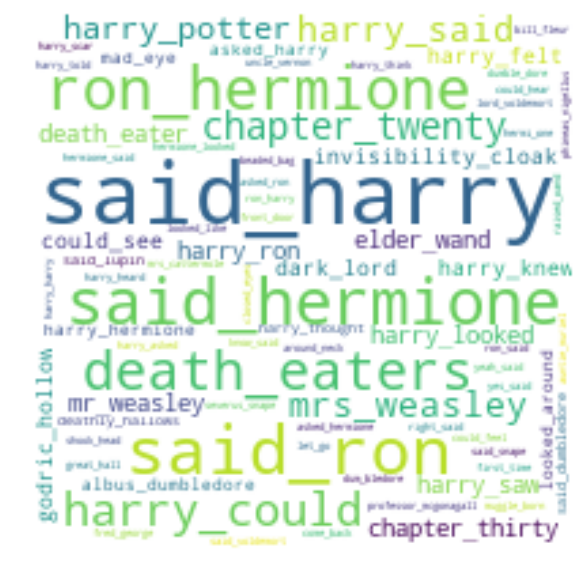

In [55]:
#generate word cloud image
import matplotlib.pyplot as plt

from wordcloud import WordCloud
#generate word cloud image
wordcloud = WordCloud(max_font_size=50, height = 200, width = 200, background_color="white").generate_from_frequencies(bgs_str_freq)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [53]:
#empty list to hold trigrams
tgs = []

#add each trigram set to list
for trigram in ngrams(new_words, 3):
    tgs.append(trigram)

In [54]:
#top 10 frequently occuring trigrams
FreqDist(tgs).most_common(50)

[(('harry', 'ron', 'hermione'), 40),
 (('harry', 'could', 'see'), 18),
 (('said', 'professor', 'mcgonagall'), 16),
 (('chapter', 'thirty', 'three'), 16),
 (('muggle', 'born', 'registration'), 15),
 (('born', 'registration', 'commission'), 15),
 (('chapter', 'twenty', 'three'), 15),
 (('life', 'lies', 'albus'), 14),
 (('lies', 'albus', 'dumbledore'), 14),
 (('tale', 'three', 'brothers'), 14),
 (('harry', 'looked', 'around'), 14),
 (('yeah', 'said', 'harry'), 14),
 (('said', 'mr', 'weasley'), 14),
 (('chapter', 'thirty', 'one'), 14),
 (('harry', 'said', 'hermione'), 13),
 (('(', 'chapter', 'thirty'), 13),
 (('(', 'flaw', 'plan'), 13),
 (('said', 'mrs', 'weasley'), 12),
 (('chapter', 'twenty', 'four'), 12),
 (('chapter', 'twenty', 'six'), 12),
 (('chapter', 'thirty', 'six'), 12),
 (('sacking', 'severus', 'snape'), 11),
 (('said', 'ron', 'looking'), 11),
 (('said', 'ron', 'harry'), 11),
 (('tales', 'beedle', 'bard'), 11),
 (('harry', 'could', 'hear'), 11),
 (('pulled', 'invisibility', 'clo